In [232]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [233]:
import reservoirpy as rpy
from reservoirpy.nodes import Reservoir, Ridge
rpy.set_seed(42) 

In [234]:
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import MinMaxScaler

Import Data

In [235]:
data = pd.read_csv("S_Dados.csv") 

X = data.drop(columns=['Saída'])
Y = data['Saída'] 
print(data)

    Entrada 01  Entrada 02     Saída
0     -5.00000   -3.000000 -0.917225
1     -4.89899   -2.939394 -0.939676
2     -4.79798   -2.878788 -0.918216
3     -4.69697   -2.818182 -0.904445
4     -4.59596   -2.757576 -0.934962
..         ...         ...       ...
95     4.59596    2.757576  1.068012
96     4.69697    2.818182  1.020520
97     4.79798    2.878788  1.083462
98     4.89899    2.939394  1.086547
99     5.00000    3.000000  1.004152

[100 rows x 3 columns]


Text(0.5, 0.92, 'Dados Normalizados')

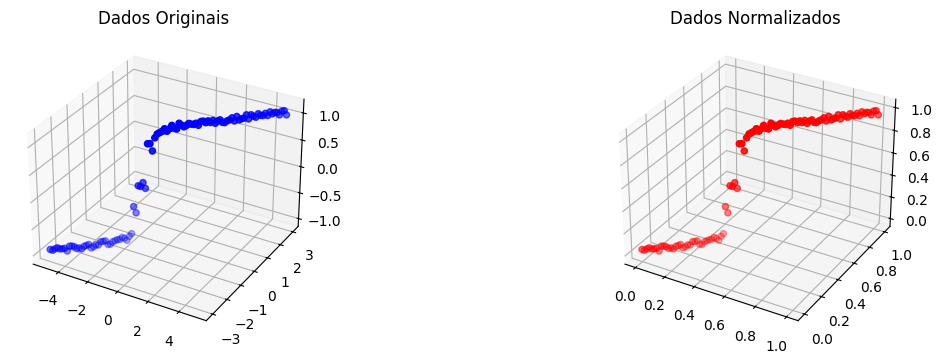

In [236]:
#scaler = StandardScaler() # média = 0 e desviopadrão = 1
scaler = MinMaxScaler()
scaler.fit(data) 

data_norm = scaler.transform(data)
data_norm = pd.DataFrame(data_norm, columns=["Entrada 01", "Entrada 02", "Saída"])

# Criando figura 3D
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(data["Entrada 01"], data["Entrada 02"], data["Saída"], c='b', marker='o')
ax.set_title("Dados Originais")
ax = fig.add_subplot(1,2,2, projection='3d')
ax.scatter(data_norm["Entrada 01"], data_norm["Entrada 01"], data_norm["Saída"], c='r', marker='o')
ax.set_title("Dados Normalizados")

In [237]:
X_train, X_valid = X[::2], X[1::2]
print(f"X_train:",X_train.shape)
Y_train = Y[::2].to_numpy().reshape(-1, 1)
Y_valid = Y[1::2].to_numpy().reshape(-1, 1)
print(f"Y_train:",Y_train.shape)

X_train: (50, 2)
Y_train: (50, 1)


Text(0.5, 0.92, 'Dados Validação')

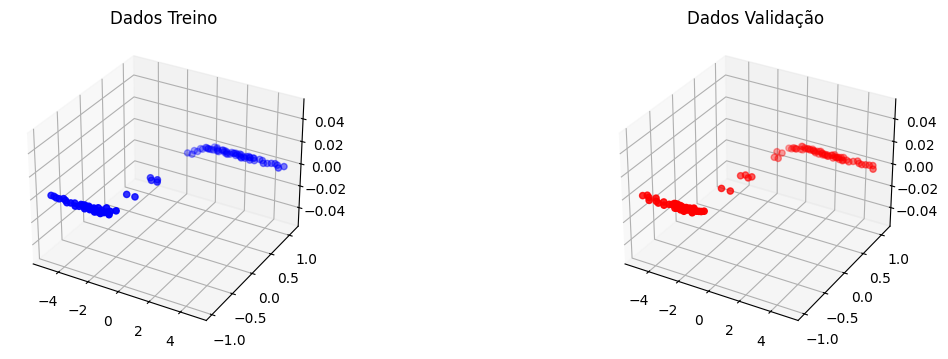

In [238]:
# Criando figura 3D
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(X_train,  Y_train, c='b', marker='o')
ax.set_title("Dados Treino")
ax = fig.add_subplot(1,2,2, projection='3d')
ax.scatter(X_valid, Y_valid, c='r', marker='o')
ax.set_title("Dados Validação")

In [239]:
reservoir = Reservoir(units=100, lr=0.5, sr=0.1)
readout = Ridge(ridge=1e-6)

ESN_model = reservoir >> readout

In [240]:
ESN_model = ESN_model.fit(X_train, Y_train, warmup=0)

In [241]:
print(reservoir.initialized, readout.initialized)

True True


In [242]:
Y_pred = ESN_model.run(X_valid)
print(Y_pred.shape)

(50, 1)


In [243]:
R2 = r2_score(Y_valid, Y_pred)
print(f"R²: {R2}")

R²: 0.988027603045623
